# Лабораторна робота 4

## Тема: OpenCV. Просторові методи обробки зображень. Робота з околом. Просторова фільтрація зображення (short version).

## Мета: знайомство з просторовими методами фільтрації зображень засобами OpenCV у середовищі Anaconda із застосуванням Jupyter Notebook засобами мови програмування Python.

*Зробив: Савченко Андрій*

*Виконав: 05.11.2024*

## Завдання для самостіної роботи

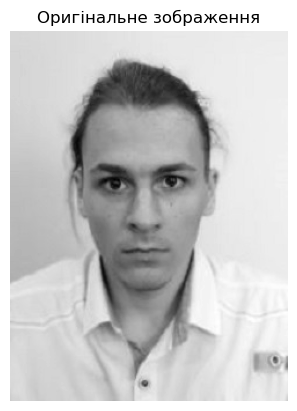

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Завантаження зображення
image_path = 'Andrey.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Функція для відображення зображень
def show_image(title, img):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Відображення оригінального зображення
show_image("Оригінальне зображення", image)

### 1. Реалізувати фільтр на основі ядра Гауса.

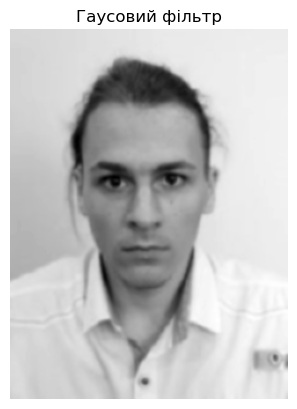

In [3]:
# Фільтр на основі ядра Гауса
def gaussian_filter(image, kernel_size=5, sigma=1):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)

# Застосування Гаусового фільтра
gaussian_filtered_image = gaussian_filter(image, kernel_size=5, sigma=1)
show_image("Гаусовий фільтр", gaussian_filtered_image)

### 2. Написати процедуру, яка б зашумлювала нормальним шумом з параметрами (n, μ, \sigms) зображення.

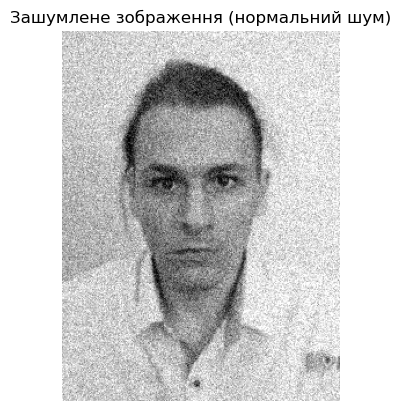

In [4]:
# Функція для додавання нормального шуму
def add_gaussian_noise(image, mean=0, sigma=25):
    noise = np.random.normal(mean, sigma, image.shape)
    noisy_image = image + noise
    noisy_image = np.clip(noisy_image, 0, 255).astype(np.uint8)
    return noisy_image

# Зашумлення зображення
noisy_image = add_gaussian_noise(image, mean=0, sigma=25)
show_image("Зашумлене зображення (нормальний шум)", noisy_image)

### 3. Взявши за основу власний портрет, зашумити його нормальним шумом.

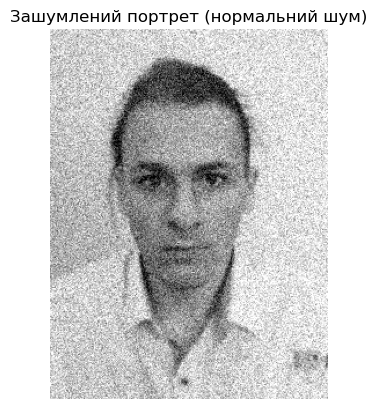

In [5]:
# Застосування шуму до портрету
portrait_noisy = add_gaussian_noise(image, mean=0, sigma=30)
show_image("Зашумлений портрет (нормальний шум)", portrait_noisy)

### 4. Реалізувати медіанний фільтр і продемонструвати послідовно роботу медіанного і гаусового фільтру, оптимально підібравши і обґрунтувавши значення параметрів.

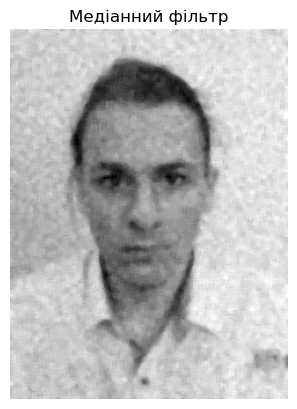

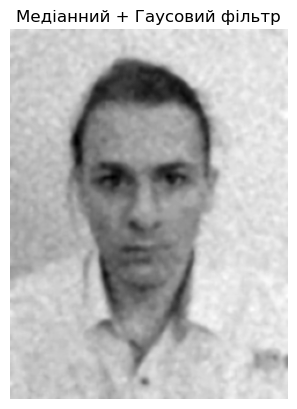

In [6]:
# Медіанний фільтр
def median_filter(image, kernel_size=5):
    return cv2.medianBlur(image, kernel_size)

# Застосування медіанного фільтру
median_filtered_image = median_filter(portrait_noisy, kernel_size=5)
show_image("Медіанний фільтр", median_filtered_image)

# Гаусовий фільтр після медіанного
combined_filtered_image = gaussian_filter(median_filtered_image, kernel_size=5, sigma=1)
show_image("Медіанний + Гаусовий фільтр", combined_filtered_image)

### 5. Реалізувати двосторонній фільтр.

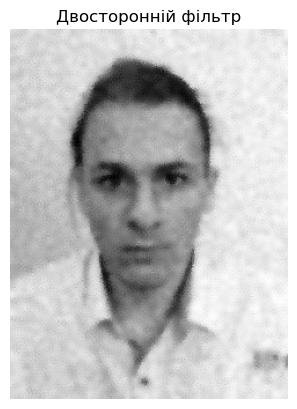

In [7]:
# Двосторонній фільтр
def bilateral_filter(image, diameter=9, sigma_color=75, sigma_space=75):
    return cv2.bilateralFilter(image, diameter, sigma_color, sigma_space)

# Застосування двостороннього фільтру
bilateral_filtered_image = bilateral_filter(portrait_noisy)
show_image("Двосторонній фільтр", bilateral_filtered_image)

### 6. Написати процедуру, до складу якої б входили всі низькочастотні фільтри, які досліджуються в цій лабораторній роботі, а вибір потрібного задавався відповідним вхідним параметром.

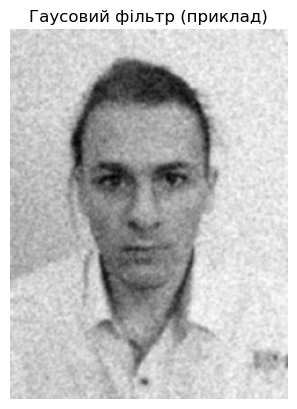

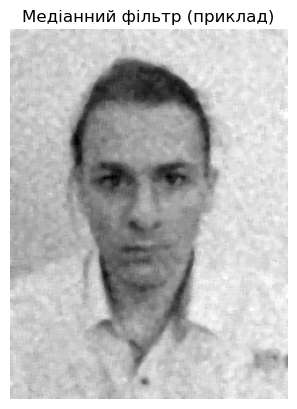

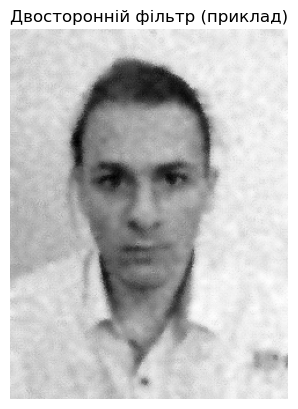

In [8]:
# Функція для вибору фільтру
def apply_filter(image, filter_type="gaussian", **kwargs):
    if filter_type == "gaussian":
        return gaussian_filter(image, **kwargs)
    elif filter_type == "median":
        return median_filter(image, **kwargs)
    elif filter_type == "bilateral":
        return bilateral_filter(image, **kwargs)
    else:
        raise ValueError("Невідомий тип фільтру: " + filter_type)

# Приклади застосування кожного фільтру
gaussian_example = apply_filter(portrait_noisy, filter_type="gaussian", kernel_size=5, sigma=1)
show_image("Гаусовий фільтр (приклад)", gaussian_example)

median_example = apply_filter(portrait_noisy, filter_type="median", kernel_size=5)
show_image("Медіанний фільтр (приклад)", median_example)

bilateral_example = apply_filter(portrait_noisy, filter_type="bilateral", diameter=9, sigma_color=75, sigma_space=75)
show_image("Двосторонній фільтр (приклад)", bilateral_example)

## Контрольні запитання

### 1. У чому полягає сенс градаційних перетворень?

Сенс градаційних перетворень полягає в зміні яскравості та контрастності зображення шляхом перетворення рівнів інтенсивності кожного пікселя. Ці перетворення дозволяють коригувати зображення, щоб виділити деталі, покращити якість або підготувати зображення до подальшої обробки. Наприклад, перетворення за допомогою лінійної або нелінійної функції (логарифмічної, степеневої) можуть зробити зображення більш виразним, особливо в разі недостатньої освітленості чи надмірної експозиції.

### 2. На чому ґрунтуються гістограмні методи?

Гістограмні методи ґрунтуються на аналізі та модифікації гістограми зображення, яка показує розподіл інтенсивностей пікселів. Наприклад, метод вирівнювання гістограми розтягує значення яскравості, щоб зробити розподіл інтенсивностей більш рівномірним. Це може поліпшити контрастність зображення, особливо якщо його гістограма зосереджена в обмеженому діапазоні. Гістограмні методи широко використовуються для підвищення візуальної якості зображень у медицині, астрономії, фотографії та інших галузях.